In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

Load in the iris data set.

In [12]:
df = pd.read_csv("./datasets/iris.csv")

In [13]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Experiment with different linkage types and choose one!

In [14]:
X = df.iloc[:,0:-1].as_matrix(columns=None)
Z = linkage(X, 'ward')

c, coph_dists = cophenet(Z, pdist(X))
print c

0.872601525064


In [15]:
links = ['single', 'complete', 'average']

for i in links:
    c, _ = cophenet(linkage(X, i), pdist(X))
    print c, i

0.86357244036 single
0.727170309992 complete
0.876696652921 average


In [16]:
Z = linkage(X, 'average')

Plot a dendrogram.  It might be hard to see given the number of data points... explore the `truncate_mode` argument to help!

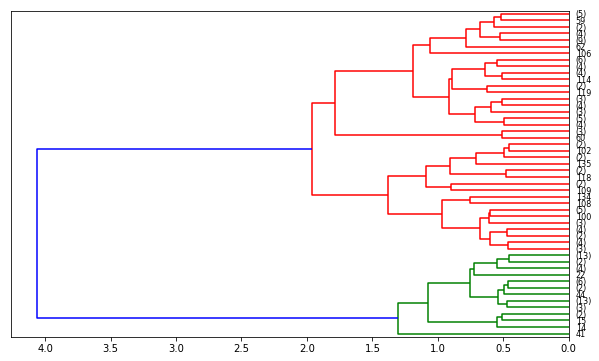

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
dn = dendrogram(Z, orientation='left', p=50, truncate_mode='lastp')


Based on the dendrogram, pick a cut point!  In this case, we know we should have 3, so create a cut that divides the data into 3 groups.  (In reality, we would typically use this type of clusting for *unsupervised* learning where we don't know the "true" groups... and there really isn't a truth)

In [18]:
max_dist = 1.9 # pairwise distance
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

Create two scatter plots of PetalWidth vs PetalLength, one for your clusters and one for the real groups.  Compare!
*Again, if this were trully an unsupervised learning problem, you wouldn't have "true" groups to compare your clusters with*.<br>
<br>
*Hint*: you might want to use LabelEncoder on the original names to allow you to plot easily...

In [19]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder().fit_transform(df['Name'])

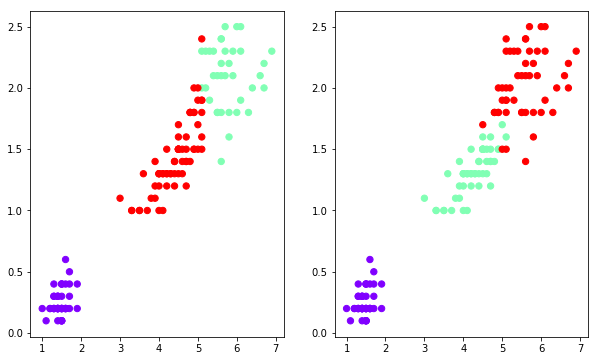

In [22]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].scatter(df['PetalLength'], df['PetalWidth'], c=clusters, cmap=cm.rainbow, s=40)
ax[1].scatter(df['PetalLength'], df['PetalWidth'], c=labels, cmap=cm.rainbow, s=40)